<b>Краткое описание. </b>

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности и проверить некоторые гипотезы. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Чтение файла

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Подготовка данных

Пропуски в столбцах опишем после переименования столбцов

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
data = data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Более детально рассмотрим пропуски в столбцах и предположим природу их происхождения

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в столбцах "name", "genre" и "year_of_release" можно будет отбросить, т.к. их доля мала. Пропуски могли появиться из-за отсутствия информации на платформах, т.к. выгрузку делали из истории и данные могли потеряться. Относительно пропусков в столбцах оценок предположения схожие, но доля пропусков в них большая

In [9]:
data['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [10]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [11]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
9.6       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [12]:
data.query('user_score=="tbd"')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Аббревиатуру 'tbd' использовали для игр, у которых еще не набралось определенное количество оценок пользователями, как непризнанная оценка, которую скоро определят. Предполагаю, что для нашего исследования их можно оставить нетронутыми. Потому что процент полезных записей для предсказания высокий.

Заменим tdb на Nan

In [13]:
data = data.replace(to_replace='tbd', value=np.nan)

In [14]:
data['user_score'] = data['user_score'].astype('float')

In [16]:
data = data.dropna(subset=['year_of_release', 'name']) 

In [18]:
data['rating']=data['rating'].fillna('no rating')

In [19]:
# Преобразование даты в удобный формат
data['year_of_release'] = pd.to_datetime(data['year_of_release'],format='%Y').dt.year

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [21]:
# Добавление столбца с суммой продаж всех регионов
data['sum_sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['other_sales']

In [22]:
data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating,0.01


### Вывод
Данные были приведены к общему нормальному виду: удалены пропуски, столбцы приведены к общему регистру и синтаксису, в некоторых столбцах заменил тип данных. Создан столбец с суммарными продажами во всех регионах. Значение "tbd" было заменено на пропуск. Решение удалять пропущенные значения будет отложено до момента проверки гипотез, тк до этого момента они нам не помешают, а даже наоборот помогут для предсказаний и анализа тенденций ближайших лет.

## Исследовательский анализ

<AxesSubplot:xlabel='year_of_release'>

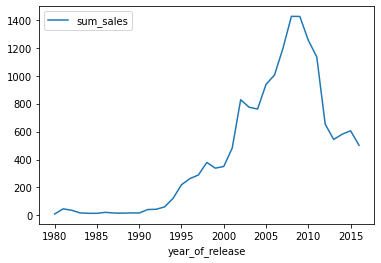

In [23]:
data.pivot_table(index='year_of_release', values='sum_sales', aggfunc='count').plot()

Нам могут быть важны данные с 2000 года, т.к. до этого количество игр было мало и они только набирали свою популярность

In [24]:
data.pivot_table(index=['platform','year_of_release'],values='sum_sales',aggfunc='sum').sort_values('sum_sales',ascending=False).head(10)

sum_sales
platform year_of_release           
PS2      2004                211.81
Wii      2009                206.97
PS2      2002                205.38
         2003                184.31
Wii      2008                171.32
X360     2010                170.03
PS       1998                169.49
PS2      2001                166.43
         2005                160.66
PS3      2011                156.78

<AxesSubplot:xlabel='year_of_release'>

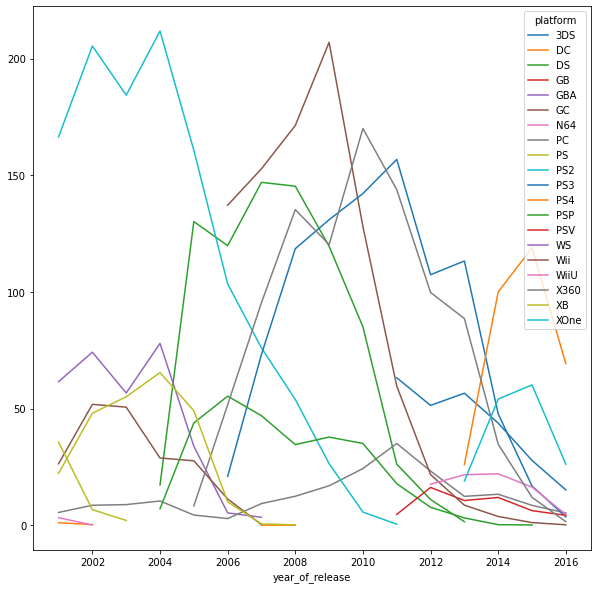

In [25]:
data.query('year_of_release>2000').pivot_table(index='year_of_release', columns='platform',values='sum_sales',aggfunc='sum').plot(figsize=(10,10))

<AxesSubplot:xlabel='year_of_release'>

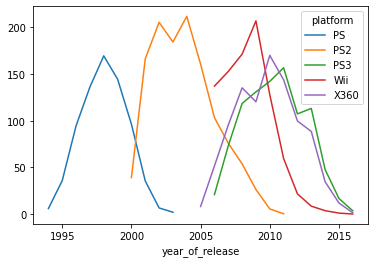

In [26]:
data.query('platform in ["PS2","Wii","X360","PS","PS3"]').pivot_table(index='year_of_release', columns='platform',values='sum_sales',aggfunc='sum').plot()

После 2000 года, количество платформ возрастало чуть ли не каждый год, а средний срок жизни платформ около 8-9 лет.
Думаю, что актуальный период для предсказнания будет 2-3 года перед годом предсказания, поэтому рассматривать дальше будем данные от 2014 года

In [27]:
data = data.query('year_of_release>=2014')

<AxesSubplot:xlabel='year_of_release'>

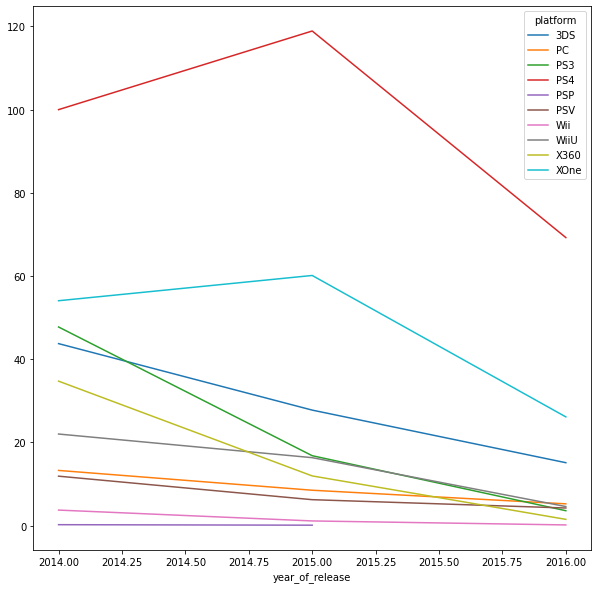

In [28]:
data.pivot_table(index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum').plot(figsize=(10,10))

Для всех платформ 2016 год был неудачным, все продажи снизились и лишь у некоторых он остался на своем уровне, но эти платформы не входят в 5 лучших.
Пятерка самых прибыльных платформ PS4 XOne 3DS PC WiiU

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

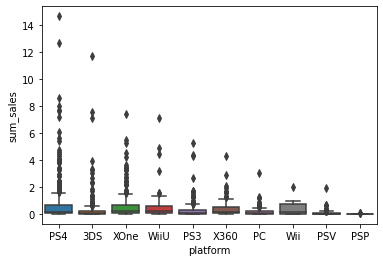

In [29]:
sns.boxplot(data=data, y='sum_sales', x='platform')

(0.0, 3.0)

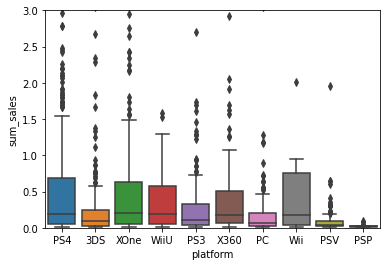

In [30]:
ax=sns.boxplot(data=data, y='sum_sales', x='platform')
ax.set_ylim([0,3])

Как видно из нашей пятерки самые большие продажи приходятся на 3 гигантов это PS4 XOne и WiiU. У остальных продажи не столь большие, 3DS и PC показывают результат ниже платформ PS3 и X360.

In [31]:
data_ps4 = data.query('platform == "PS4"')

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

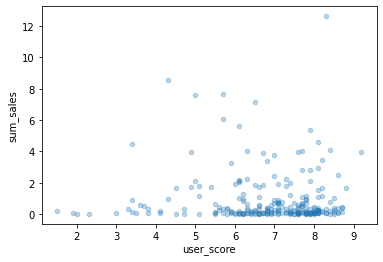

In [32]:
data_ps4.plot('user_score','sum_sales', kind='scatter', alpha=0.3)

Как видно оценка пользователей может играть какую-то роль, но отсутсвует явная связь, вероятнее всего взаимозависимая с другими показателем

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

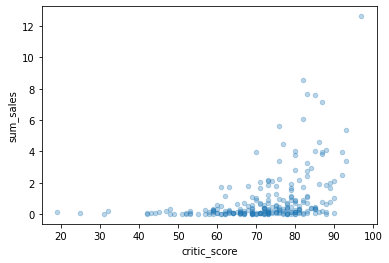

In [33]:
data_ps4.plot('critic_score','sum_sales', kind='scatter', alpha=0.3)

Чем выше оценка критиков, тем больше будет продаж игры

In [34]:
print(data_ps4['user_score'].corr(data['sum_sales']))
print(data_ps4['critic_score'].corr(data['sum_sales']))

-0.040131589472697356
0.40266141068104083


Корреляция показывет отсутствие взаимосвязи пользовательских оценок на суммарные продажи. Корреляция доказывет среднее влияние оценок критиков на суммарные продажи.

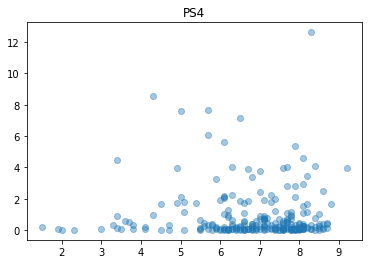

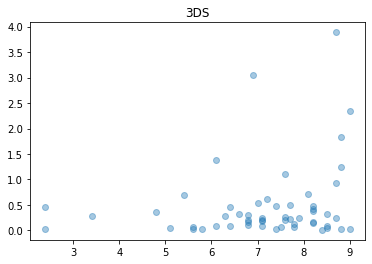

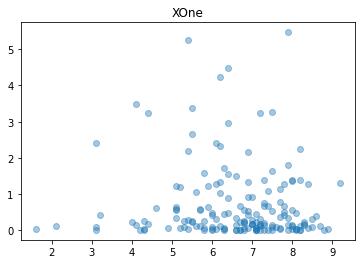

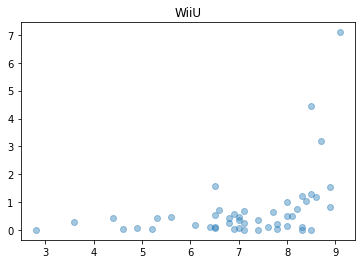

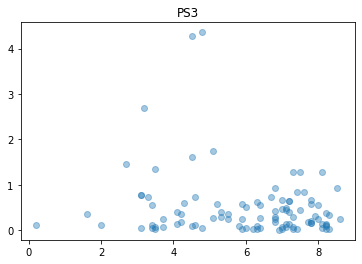

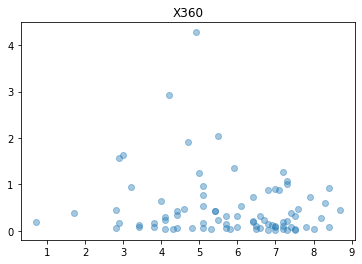

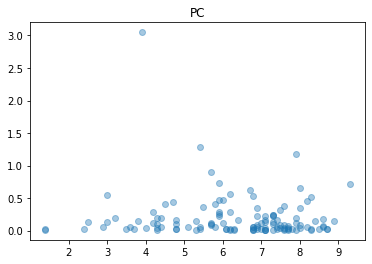

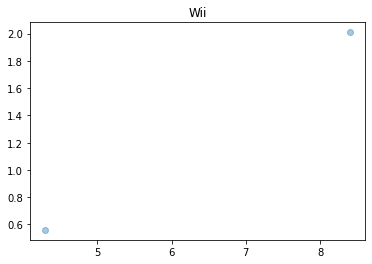

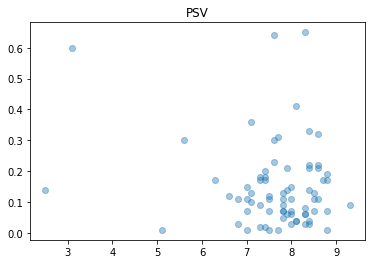

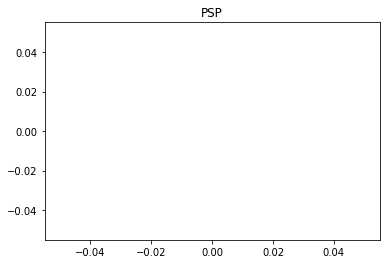

In [35]:
for i in data['platform'].unique():
  plt.scatter(data[data['platform']==i]['user_score'],data[data['platform']==i]['sum_sales'], alpha=0.4)
  plt.title(i)
  plt.show()

На графиках видно, что тенденции схожие с PS4 имеются у некоторых платформ: PC, 3DS, WiiU, XOne. Для них так же характерны некоторые увеличения продаж при высоких пользовательских оценках, но в основном пользовательские оценки не влияют.

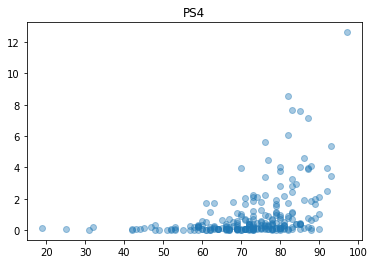

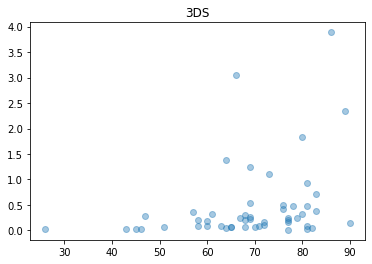

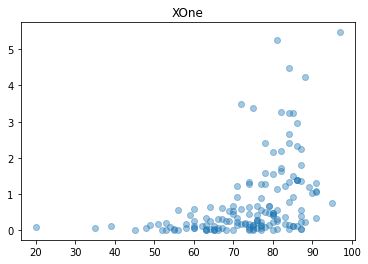

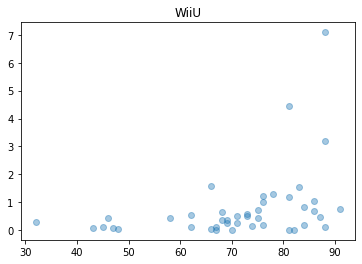

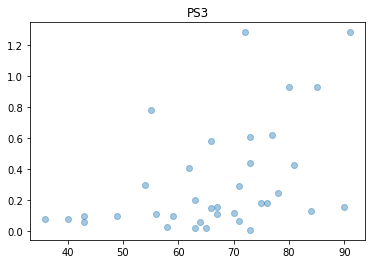

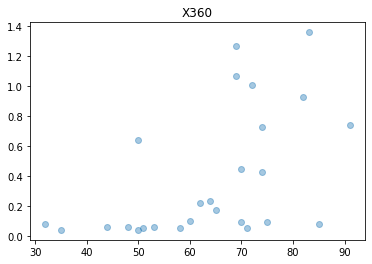

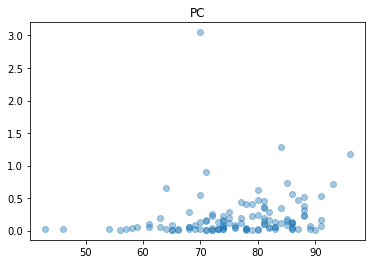

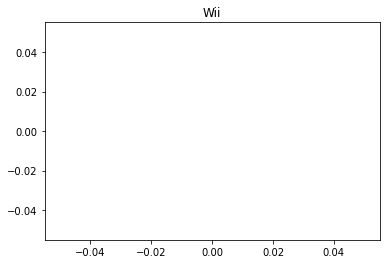

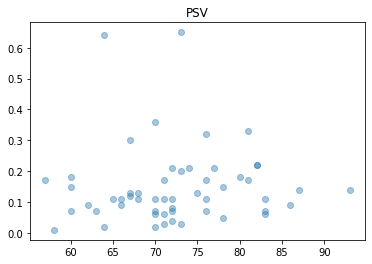

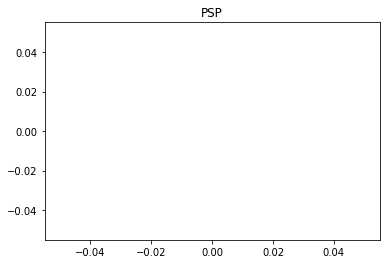

In [36]:
for i in data['platform'].unique():
  plt.scatter(data[data['platform']==i]['critic_score'],data[data['platform']==i]['sum_sales'], alpha=0.4)
  plt.title(i)
  plt.show()

Графики подтверждают положительную связь оценок критиков и суммарных продаж. Только на платформе PSV не была замечена связь. На остальных платформах суммарные продажи игры растут от оценки критиков. Чем выше, тем больше продаж.

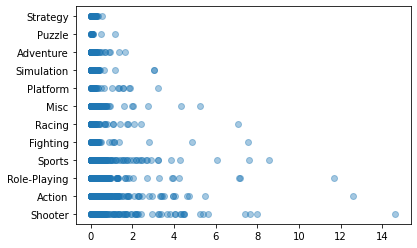

In [37]:
plt.scatter(data['sum_sales'],data['genre'], alpha=0.4)

In [38]:
data.pivot_table(index='genre',values='sum_sales').sort_values('sum_sales',ascending=False)

,sum_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


Жанры Shooter, Sports, Platform, Fighting и Role-Playing имеют наибольшее количество продаж, а жанры Puzzle, Strategy и Adventure совсем не популярны и количество продаж в них очень мало. Самые продаваемые жанры имеют общие черты: они очень динамичные и могут быть многопользовательскими.

### Вывод
Рассмотрев данные за весь период, выяснили, что для анализа нам могут потребоваться данные не позже 2000 годов. Благодаря данным за все время, выяснили средний срок жизни платформ, около 8 лет.Для прогнозирования данных на следующий год оставили данные только за актуальный период с 2014 года. Рассмотрели наиболее прибыльные платформы, проверили связь между продажами и оценками критиков, продажами и пользовательскими оценками. Выяснили наиболее продаваемые жанры.

## Составление портрета пользователя разных регионов

In [39]:
for region in ['NA_sales','EU_sales','JP_sales']:
  platforms=data.pivot_table(index='platform', values=region, aggfunc='sum').reset_index()
  platforms[region] = round(platforms[region]/platforms[region].sum()*100, 2)
  display(platforms.sort_values(region, ascending=False).reset_index(drop=True).head())

,platform,NA_sales
0,PS4,34.71
1,XOne,28.61
2,X360,9.96
3,3DS,7.97
4,PS3,7.76


,platform,EU_sales
0,PS4,48.04
1,XOne,17.09
2,PS3,9.44
3,PC,6.64
4,3DS,5.96


,platform,JP_sales
0,3DS,47.52
1,PS4,16.13
2,PSV,15.62
3,PS3,12.05
4,WiiU,7.85


<AxesSubplot:ylabel='NA_sales'>

<AxesSubplot:ylabel='EU_sales'>

<AxesSubplot:ylabel='JP_sales'>

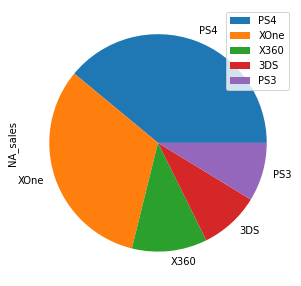

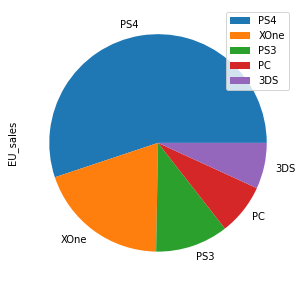

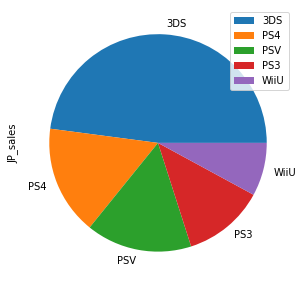

In [40]:
for region in ['NA_sales','EU_sales','JP_sales']:
    display(data.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(region, ascending=False).head().plot.pie(y=region,figsize=(5,5),))

Предпочтения пользователей по игровым платформам в NA и EU схожи, но некоторые различия имеются. В EU появился жанр PC и пропал X360. Пользователи в JP отдают свои предпочтения другой платформе это 3DS. В JP 3DS вытеснило на второй план PS4, популярную в EU и NA. А так же в JP не предпочитают PC.

In [41]:
for region in ['NA_sales','EU_sales','JP_sales']:
  genres=data.pivot_table(index='genre', values=region, aggfunc='sum').reset_index()
  genres[region] = round(genres[region]/genres[region].sum()*100, 2)
  display(genres.sort_values(region, ascending=False).reset_index(drop=True).head())

,genre,NA_sales
0,Shooter,27.82
1,Action,25.53
2,Sports,16.24
3,Role-Playing,11.78
4,Misc,5.30


,genre,EU_sales
0,Action,27.59
1,Shooter,24.21
2,Sports,16.89
3,Role-Playing,10.41
4,Racing,5.22


,genre,JP_sales
0,Role-Playing,33.47
1,Action,31.78
2,Fighting,6.84
3,Misc,6.03
4,Shooter,5.23


<AxesSubplot:ylabel='NA_sales'>

<AxesSubplot:ylabel='EU_sales'>

<AxesSubplot:ylabel='JP_sales'>

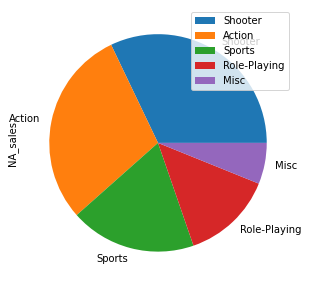

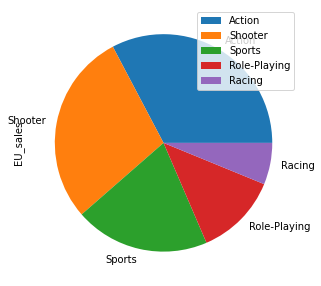

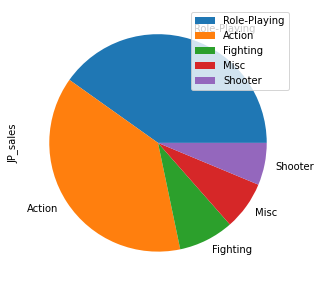

In [42]:
for region in ['NA_sales','EU_sales','JP_sales']:
    display(data.pivot_table(index='genre', values=region, aggfunc='sum').sort_values(region, ascending=False).head().plot.pie(y=region,figsize=(5,5)))

Как и с платформами, у пользователей в NA и EU предпочтения в жанрах сходятся, за исключением смены лидирующих жанров местами и сменили жанр Misc на Racing в EU. А пользователи из JP любят намного больше Role_playing жанр, сместив всеобщих лидеров Action и Shooter и так же популярность набрали жанры Fighting и Misc.

In [43]:
data.pivot_table(index='platform',columns='rating',values=['NA_sales','EU_sales','JP_sales'],aggfunc='sum')

EU_sales                               JP_sales                    \
rating          E  E10+      M      T no rating        E  E10+     M     T   
platform                                                                     
3DS          3.84  2.43   0.09   0.80      8.96     4.07  1.99  0.37  4.57   
PC           2.19  0.91   7.48   4.19      3.20     0.00  0.00  0.00  0.00   
PS3          7.62  2.92   6.66   2.49      5.85     0.65  0.14  1.55  2.78   
PS4         25.14  6.09  52.81  18.31     27.69     0.72  0.21  4.87  2.97   
PSP           NaN   NaN    NaN    NaN      0.00      NaN   NaN   NaN   NaN   
PSV          0.40  1.02   0.56   0.67      0.88     0.05  0.28  0.80  4.05   
Wii          0.42  2.01    NaN    NaN      0.16     0.00  0.00   NaN   NaN   
WiiU         5.59  4.10   0.38   1.13      1.95     3.42  1.81  0.18  0.37   
X360         4.12  3.34   4.40   1.49      2.14     0.00  0.00  0.06  0.01   
XOne         8.74  3.34  21.06   4.99      8.12     0.03  0.03  0.18  0.03   

                   NA_sales                                
rating   no rating        E  E10+      M      T no rating  
platform                                                   
3DS          33.24     4.09  3.26   0.49   1.48     13.32  
PC            0.00     0.13  0.27   4.38   2.14      0.31  
PS3           6.10     5.66  2.69   5.57   3.01      5.12  
PS4           6.25    14.38  6.82  37.72  16.38     23.31  
PSP           0.36      NaN   NaN    NaN    NaN      0.00  
PSV           9.36     0.18  0.25   0.79   0.76      0.54  
Wii           0.00     0.15  1.91    NaN    NaN      0.02  
WiiU          1.53     7.90  5.52   0.43   1.64      3.87  
X360          0.01     7.28  5.10   8.62   3.48      3.82  
XOne          0.05    10.97  7.41  38.42  10.06     14.41

<AxesSubplot:xlabel='None-rating', ylabel='platform'>

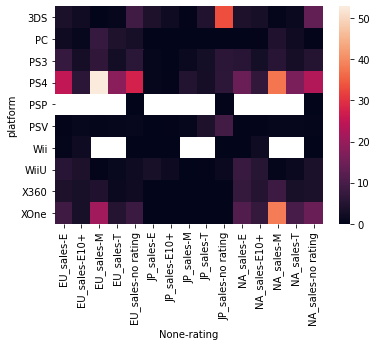

In [44]:
sns.heatmap(data=data.pivot_table(index='platform',columns='rating',values=['NA_sales','EU_sales','JP_sales'],aggfunc='sum'))

Рейтинг ESRB оказывает влияние на продажи игр в отдельных регионах. Наиболее продаваемые игры имели рейтинг E и M в регионах EU и NA. А в регионе JP рейтинг влияет иначе: чаще продаются  игры рейтинга E и E10+, за исключением одной платформы, где рейтинг M очень уж популярен. Плюс некоторые платформы в EU и NA хорошо продавали игры без рейтинга.

### Вывод
Портрет пользователей позволяет нам определиться с какой целевой аудиторией предстоит работать и какой жанр и на какой платформе могут быть удачные продажи. Пользователи EU и NA имеют схожие черты, в то время как игроки из JP любят другие жанры и платформы. Также требуется учитывать рейтинг ESRB, ведь в каждом регионе есть свой предпочтения.

## Проверка гипотез
В обоих гипотезах будем проверять связь при помощи ttest_ind, для двух независимых выборок, с параметром equal_var=False, т.к. неизвестно равны ли дисперсии и размер выборок различный

<b>Нулевая гипотеза:</b> средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<b>Альтернативная гипотеза:</b> средние пользовательские рейтинги платформ разные

<b>Критический уровень статистической значимости 0.05</b>

Для подтверждения гипотез удалим все пустые значения в user_score

In [45]:
data = data.dropna(subset=['user_score'])

In [46]:
st.ttest_ind(data[data['platform']=='XOne']['user_score'], data[data['platform']=='PC']['user_score'], equal_var=False).pvalue

0.11601398086668827

Полученное P-value не позволяет отклонить нулевую гипотезу ($0.05<0.11$). Следовательно, рейтинги Xbox One и PC одинаковые. Сравним средние значения выборки.

In [47]:
print('Среднее значение пользовательских оценок Xbox One =', round(data[data['platform']=='XOne']['user_score'].mean(),3))
print('Среднее значение пользовательских оценок PC =', round(data[data['platform']=='PC']['user_score'].mean(),3))

Среднее значение пользовательских оценок Xbox One = 6.595
Среднее значение пользовательских оценок PC = 6.298


<b>Нулевая гипотеза:</b> средние пользовательские рейтинги жанров Action и Sports одинаковые

<b>Альтернативная гипотеза:</b> средние пользовательские рейтинги жанров Action и Sports различные

<b>Критический уровень статистической значимости 0.05

In [48]:
st.ttest_ind(data[data['genre']=='Action']['user_score'], data[data['genre']=='Sports']['user_score'], equal_var=False).pvalue

1.1825550382644557e-14

Значение P-value крайне мало($1*10^-14$), что даёт нам право отклонить нулевую гипотезу и принять альтернативную. Для полного подтверждения предположений алтернативной гипотезы сверим средние значения выборки.

In [49]:
print('Среднее значение оценок пользователей жанра Action =', round(data[data['genre']=='Action']['user_score'].mean(),3))
print('Среднее значение оценок пользователей жанра Sports =', round(data[data['genre']=='Sports']['user_score'].mean(),3))

Среднее значение оценок пользователей жанра Action = 6.761
Среднее значение оценок пользователей жанра Sports = 5.225


## Общий вывод
Подводя итоги, были произведены:
* Обработка данных, чистка, приведение к нужным типам и синтаксису столбцов, разобрано и заменено значение "tbd"
* Добавлены необходимый столбец с суммарными продажами
* Проведен исследовательский анализ, из которого выяснили актуальный период и средний срок жизни платформ
* Рассмотрели лидирующие на рынке платформы и самые популярные жанры
* Выяснили какие платформы и жанры нравятся пользователям разных регионов
* Проверили взаимосвязи оценок пользователей и критиков с продажами
* Выяснили, что средние оценки пользователей у Xbox One и PC одинаковые
* Опровергли равенство пользовательских оценок жанров Action и Sports

Из всего выше сказанного, можно предположить, что в следующем году игры в жанре Action или Shooter в регионе EU и NA и на платформе PS4 или Xbox One будут иметь наиболее удачные продажи, нежели у остальных. А для региона JP будет лучшим решением  жанр Role-playing на платформе 3DS или та же PS4.